In [1]:
import pandas as pd
import os
import datetime
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
from scipy import stats
sns.set(color_codes=True)

In [2]:
df_train = pd.read_csv ('ml_case_training_data.csv')
df_hist = pd.read_csv ('ml_case_training_hist_data.csv')
df_churn = pd.read_csv ('ml_case_training_output.csv')

In [3]:
df_train.isnull().sum()

id                              0
activity_new                 9545
campaign_disc_ele           16096
channel_sales                4218
cons_12m                        0
cons_gas_12m                    0
cons_last_month                 0
date_activ                      0
date_end                        2
date_first_activ            12588
date_modif_prod               157
date_renewal                   40
forecast_base_bill_ele      12588
forecast_base_bill_year     12588
forecast_bill_12m           12588
forecast_cons               12588
forecast_cons_12m               0
forecast_cons_year              0
forecast_discount_energy      126
forecast_meter_rent_12m         0
forecast_price_energy_p1      126
forecast_price_energy_p2      126
forecast_price_pow_p1         126
has_gas                         0
imp_cons                        0
margin_gross_pow_ele           13
margin_net_pow_ele             13
nb_prod_act                     0
net_margin                     15
num_years_anti

In [4]:
df_hist.isnull().sum()

id                 0
price_date         0
price_p1_var    1359
price_p2_var    1359
price_p3_var    1359
price_p1_fix    1359
price_p2_fix    1359
price_p3_fix    1359
dtype: int64

In [5]:
df_train = df_train.drop_duplicates(subset=['id'])

In [6]:
df_train.shape

(16096, 32)

In [7]:
df_missing = df_train.columns[df_train.isnull().any()]

In [8]:
df_missing.shape

(20,)

In [9]:
df_missing

Index(['activity_new', 'campaign_disc_ele', 'channel_sales', 'date_end',
       'date_first_activ', 'date_modif_prod', 'date_renewal',
       'forecast_base_bill_ele', 'forecast_base_bill_year',
       'forecast_bill_12m', 'forecast_cons', 'forecast_discount_energy',
       'forecast_price_energy_p1', 'forecast_price_energy_p2',
       'forecast_price_pow_p1', 'margin_gross_pow_ele', 'margin_net_pow_ele',
       'net_margin', 'origin_up', 'pow_max'],
      dtype='object')

In [10]:
df_train = df_train.drop(columns = ['activity_new', 'campaign_disc_ele','date_first_activ', 
                                    'forecast_base_bill_ele', 
                                    'forecast_base_bill_year', 'forecast_bill_12m', 'forecast_cons', 
                                    'channel_sales', 'date_modif_prod', 'date_renewal', 'origin_up'])

In [11]:
df_train = df_train.dropna(subset=['date_end', 'pow_max', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'net_margin'])

In [12]:
df_train.shape

(16079, 21)

In [13]:
df_hist = df_hist.drop_duplicates(subset=['id'])

In [14]:
df_hist.shape

(16096, 8)

In [15]:
df_hist = df_hist.dropna(subset=['price_p1_var', 'price_p2_var', 'price_p3_var', 
                                 'price_p1_fix', 'price_p2_fix', 'price_p3_fix'])

In [16]:
df_hist.shape

(16060, 8)

In [17]:
df_churn.shape

(16096, 2)

In [18]:
df = pd.merge(df_train, df_hist, on='id')
df = pd.merge(df, df_churn, on='id')
df.shape

(16043, 29)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16043 entries, 0 to 16042
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        16043 non-null  object 
 1   cons_12m                  16043 non-null  int64  
 2   cons_gas_12m              16043 non-null  int64  
 3   cons_last_month           16043 non-null  int64  
 4   date_activ                16043 non-null  object 
 5   date_end                  16043 non-null  object 
 6   forecast_cons_12m         16043 non-null  float64
 7   forecast_cons_year        16043 non-null  int64  
 8   forecast_discount_energy  15922 non-null  float64
 9   forecast_meter_rent_12m   16043 non-null  float64
 10  forecast_price_energy_p1  15922 non-null  float64
 11  forecast_price_energy_p2  15922 non-null  float64
 12  forecast_price_pow_p1     15922 non-null  float64
 13  has_gas                   16043 non-null  object 
 14  imp_co

In [20]:
df['cons_12m']=df['cons_12m'].mask(df['cons_12m']==0).fillna(df['cons_12m'].mean())
df['cons_last_month']=df['cons_last_month'].mask(df['cons_last_month']==0).fillna(df['cons_last_month'].mean())
df['forecast_cons_12m']=df['forecast_cons_12m'].mask(df['forecast_cons_12m']==0).fillna(df['forecast_cons_12m'].mean())
df['forecast_meter_rent_12m']=df['forecast_meter_rent_12m'].mask(df['forecast_meter_rent_12m']==0).fillna(df['forecast_meter_rent_12m'].mean())
df['forecast_cons_year']=df['forecast_cons_year'].mask(df['forecast_cons_year']==0).fillna(df['forecast_cons_year'].mean())
df['imp_cons']=df['imp_cons'].mask(df['imp_cons']==0).fillna(df['imp_cons'].mean())
df['forecast_discount_energy']=df['forecast_discount_energy'].mask(df['forecast_discount_energy']==0).fillna(df['forecast_discount_energy'].mean())
df['forecast_price_energy_p1']=df['forecast_price_energy_p1'].mask(df['forecast_price_energy_p1']==0).fillna(df['forecast_price_energy_p1'].mean())
df['cons_gas_12m']=df['cons_gas_12m'].mask(df['cons_gas_12m']==0).fillna(df['cons_gas_12m'].mean())
df['forecast_price_energy_p2']=df['forecast_price_energy_p2'].mask(df['forecast_price_energy_p2']==0).fillna(df['forecast_price_energy_p2'].mean())
df['forecast_price_pow_p1']=df['forecast_price_pow_p1'].mask(df['forecast_price_pow_p1']==0).fillna(df['forecast_price_pow_p1'].mean())

In [21]:
df_missing = df.columns[df.isnull().any()]
df_missing

Index([], dtype='object')

In [22]:
df[df_missing].isna().sum()

Series([], dtype: float64)

In [23]:
df.isnull().sum()

id                          0
cons_12m                    0
cons_gas_12m                0
cons_last_month             0
date_activ                  0
date_end                    0
forecast_cons_12m           0
forecast_cons_year          0
forecast_discount_energy    0
forecast_meter_rent_12m     0
forecast_price_energy_p1    0
forecast_price_energy_p2    0
forecast_price_pow_p1       0
has_gas                     0
imp_cons                    0
margin_gross_pow_ele        0
margin_net_pow_ele          0
nb_prod_act                 0
net_margin                  0
num_years_antig             0
pow_max                     0
price_date                  0
price_p1_var                0
price_p2_var                0
price_p3_var                0
price_p1_fix                0
price_p2_fix                0
price_p3_fix                0
churn                       0
dtype: int64

In [24]:
df.dtypes

id                           object
cons_12m                    float64
cons_gas_12m                float64
cons_last_month             float64
date_activ                   object
date_end                     object
forecast_cons_12m           float64
forecast_cons_year          float64
forecast_discount_energy    float64
forecast_meter_rent_12m     float64
forecast_price_energy_p1    float64
forecast_price_energy_p2    float64
forecast_price_pow_p1       float64
has_gas                      object
imp_cons                    float64
margin_gross_pow_ele        float64
margin_net_pow_ele          float64
nb_prod_act                   int64
net_margin                  float64
num_years_antig               int64
pow_max                     float64
price_date                   object
price_p1_var                float64
price_p2_var                float64
price_p3_var                float64
price_p1_fix                float64
price_p2_fix                float64
price_p3_fix                

In [25]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cons_12m,16043.0,195045.286423,676631.435153,-125276.000000,6081.500000,15878.000000,52482.500000,1.609711e+07
cons_gas_12m,16043.0,58043.552022,173422.774898,-3037.000000,31924.053107,31924.053107,31924.053107,4.188440e+06
cons_last_month,16043.0,25744.766852,81332.539957,-91386.000000,1436.500000,7762.000000,19429.075859,4.538720e+06
forecast_cons_12m,16043.0,2417.188907,4020.667470,-16689.260000,554.560000,1256.970000,2688.030000,1.038019e+05
forecast_cons_year,16043.0,2674.201095,5057.893349,-85627.000000,1156.000000,1904.733092,1993.000000,1.753750e+05
forecast_discount_energy,16043.0,1.937507,4.958649,0.990265,0.990265,0.990265,0.990265,5.000000e+01
forecast_meter_rent_12m,16043.0,73.801941,77.221345,-242.960000,16.430000,24.700000,131.480000,2.411690e+03
forecast_price_energy_p1,16043.0,0.136091,0.025565,0.000600,0.115237,0.142881,0.146348,2.739630e-01
forecast_price_energy_p2,16043.0,0.076736,0.022828,0.052952,0.052952,0.086027,0.098837,1.959750e-01
forecast_price_pow_p1,16043.0,43.799681,3.878491,-0.122184,40.606701,44.311378,44.311378,5.944471e+01


In [26]:
df["has_gas"]= df["has_gas"].replace(["t", "f"],[1,0])

In [27]:
churn = df[["id","churn"]]
churn_total = churn.groupby(churn["churn"]).count()
churn_percentage = churn_total/churn_total.sum()*100

In [28]:
churn_total

,id
churn,
0,14453
1,1590


In [29]:
churn_percentage

,id
churn,
0,90.089135
1,9.910865


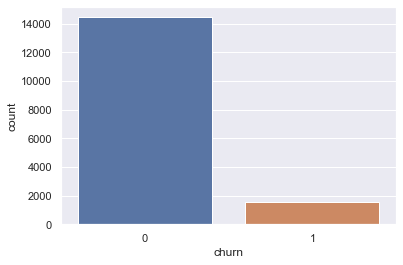

In [30]:
sns.countplot(data=df,x="churn")

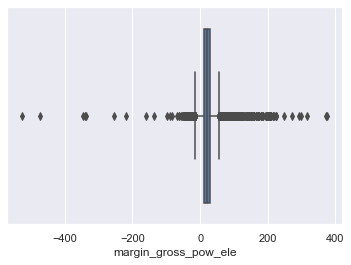

In [31]:
sns.boxplot(x=df['margin_gross_pow_ele'])

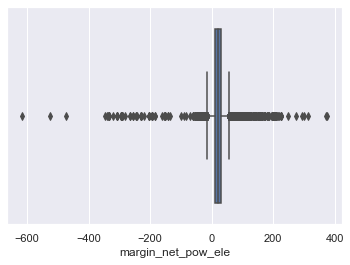

In [32]:
sns.boxplot(x=df['margin_net_pow_ele'])

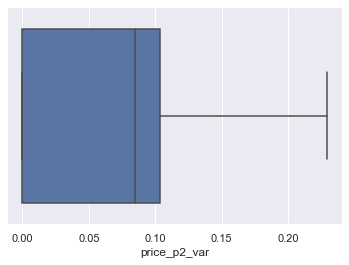

In [33]:
sns.boxplot(x=df['price_p2_var'])

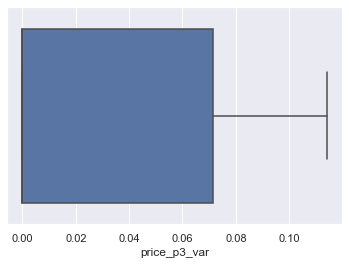

In [34]:
sns.boxplot(x=df['price_p3_var'])

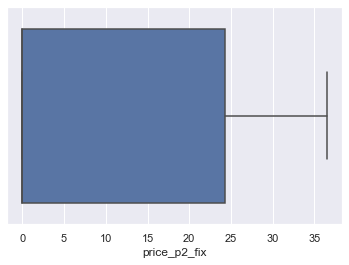

In [35]:
sns.boxplot(x=df['price_p2_fix'])

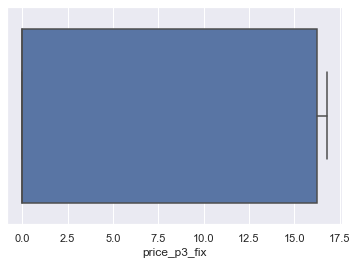

In [36]:
sns.boxplot(x=df['price_p3_fix'])

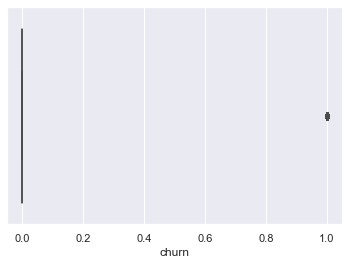

In [37]:
sns.boxplot(x=df['churn'])

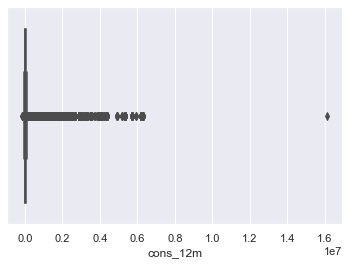

In [38]:
sns.boxplot(x=df['cons_12m'])

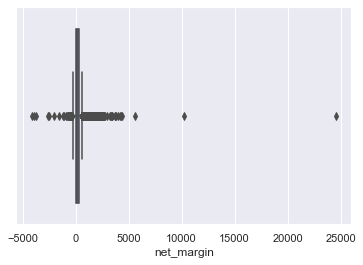

In [39]:
sns.boxplot(x=df['net_margin'])

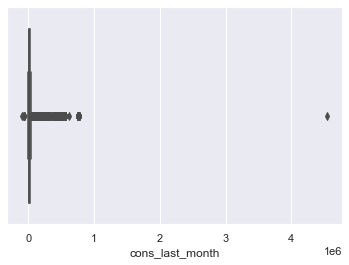

In [40]:
sns.boxplot(x=df['cons_last_month'])

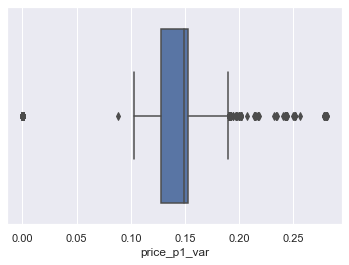

In [41]:
sns.boxplot(x=df['price_p1_var'])

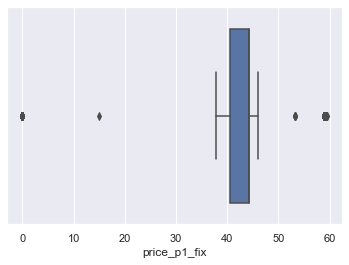

In [42]:
sns.boxplot(x=df['price_p1_fix'])

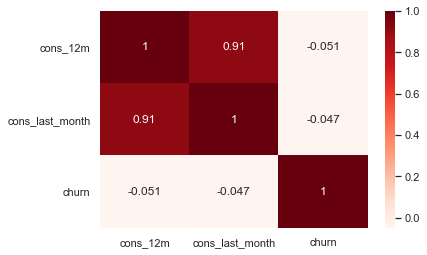

In [43]:
df[['cons_12m','cons_last_month','churn']].corr()
sns.heatmap(df[['cons_12m','cons_last_month','churn']].corr(), annot=True, cmap = 'Reds')
plt.show()

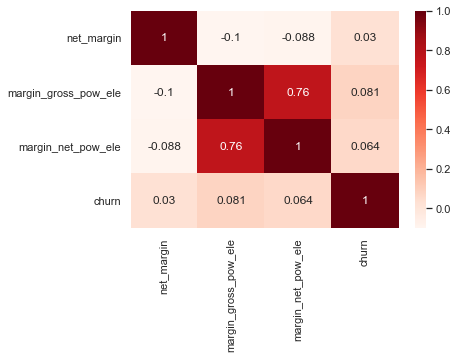

In [44]:
df[['net_margin','margin_gross_pow_ele', 'margin_net_pow_ele', 'churn']].corr()
sns.heatmap(df[['net_margin','margin_gross_pow_ele','margin_net_pow_ele', 'churn']].corr(), annot=True, cmap = 'Reds')
plt.show()

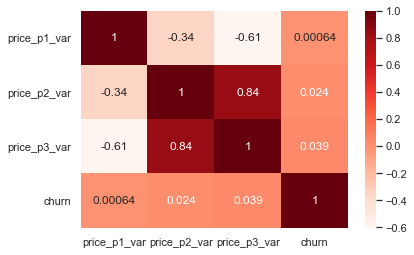

In [45]:
df[['price_p1_var','price_p2_var', 'price_p3_var', 'churn']].corr()
sns.heatmap(df[['price_p1_var','price_p2_var','price_p3_var', 'churn']].corr(), annot=True, cmap = 'Reds')
plt.show()

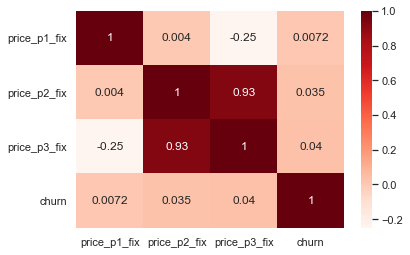

In [46]:
df[['price_p1_fix','price_p2_fix', 'price_p3_fix', 'churn']].corr()
sns.heatmap(df[['price_p1_fix','price_p2_fix','price_p3_fix', 'churn']].corr(), annot=True, cmap = 'Reds')
plt.show()

In [47]:
print(stats.pointbiserialr(df['cons_12m'], df['churn']))
print(stats.pointbiserialr(df['cons_last_month'], df['churn']))
print(stats.pointbiserialr(df['net_margin'], df['churn']))
print(stats.pointbiserialr(df['margin_gross_pow_ele'], df['churn']))
print(stats.pointbiserialr(df['margin_net_pow_ele'], df['churn']))
print(stats.pointbiserialr(df['imp_cons'], df['churn']))

PointbiserialrResult(correlation=-0.05133529999196009, pvalue=7.71979366575894e-11)
PointbiserialrResult(correlation=-0.046952433827786536, pvalue=2.6837444449820683e-09)
PointbiserialrResult(correlation=0.029937486076689633, pvalue=0.00014915904475793943)
PointbiserialrResult(correlation=0.08116421434887755, pvalue=7.305129917068196e-25)
PointbiserialrResult(correlation=0.06390586489897998, pvalue=5.404969443247379e-16)
PointbiserialrResult(correlation=0.0028309095781571523, pvalue=0.7199403480677509)


In [48]:
print(stats.pointbiserialr(df['price_p1_var'], df['churn']))
print(stats.pointbiserialr(df['price_p2_var'], df['churn']))
print(stats.pointbiserialr(df['price_p3_var'], df['churn']))
print(stats.pointbiserialr(df['price_p1_fix'], df['churn']))
print(stats.pointbiserialr(df['price_p2_fix'], df['churn']))
print(stats.pointbiserialr(df['price_p3_fix'], df['churn']))

PointbiserialrResult(correlation=0.0006399991377887123, pvalue=0.9353969400211631)
PointbiserialrResult(correlation=0.024356882154935762, pvalue=0.0020335822619646044)
PointbiserialrResult(correlation=0.03912184198132282, pvalue=7.169259153583724e-07)
PointbiserialrResult(correlation=0.007230515072908615, pvalue=0.359790361300398)
PointbiserialrResult(correlation=0.03522659972789892, pvalue=8.086818882045716e-06)
PointbiserialrResult(correlation=0.0402584477328794, pvalue=3.381416737571077e-07)


In [49]:
df_plot = df

In [50]:
df_plot.loc[df_plot.cons_12m < 0,"cons_12m"]

1030       -348.0
1467       -400.0
1520      -2559.0
2952       -620.0
4254     -17715.0
4585      -2271.0
4999     -17957.0
5147      -3319.0
5315      -2752.0
5801      -8543.0
6098       -348.0
6369      -1373.0
8091    -125276.0
8169     -19063.0
8434      -2840.0
10005      -689.0
10098      -426.0
10117    -13898.0
10907      -234.0
11197      -206.0
11241   -125276.0
11885     -1635.0
11902   -116957.0
12899     -9457.0
13050      -169.0
13538      -681.0
14341        -1.0
Name: cons_12m, dtype: float64

In [51]:
df_plot.loc[df_plot.cons_12m < 0,"cons_12m"] = np.nan
df_plot.loc[df_plot.cons_gas_12m < 0,"cons_gas_12m"] = np.nan
df_plot.loc[df_plot.cons_last_month < 0,"cons_last_month"] = np.nan
df_plot.loc[df_plot.forecast_cons_12m < 0,"forecast_cons_12m"] = np.nan
df_plot.loc[df_plot.forecast_cons_year < 0,"forecast_cons_year"] = np.nan
df_plot.loc[df_plot.forecast_meter_rent_12m < 0,"forecast_meter_rent_12m"] = np.nan
df_plot.loc[df_plot.imp_cons < 0,"imp_cons"] = np.nan

In [52]:
df_plot.loc[df_plot["cons_12m"].isna()]

,id,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,...,num_years_antig,pow_max,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix,churn
1030,d9207ee16592011253eef1bad33e3646,NaN,2396.000000,19429.075859,2012-06-18,2016-06-18,NaN,1904.733092,0.990265,15.700000,...,4,15.000,2015-01-01,0.151367,0.000000,0.000000,44.266931,0.000000,0.000000,1
1467,6f7c25ec185db87d3682c7c6c5d0325f,NaN,31924.053107,141.000000,2010-05-24,2016-03-16,81.460000,141.000000,0.990265,13.760000,...,6,10.392,2015-01-01,0.168422,0.083835,0.000000,44.266930,0.000000,0.000000,0
1520,34d993f3a16e766780f61f36a9ef22c1,NaN,30045.000000,3.000000,2011-12-02,2016-12-02,NaN,3.000000,0.990265,129.250000,...,4,40.000,2015-01-01,0.131032,0.108896,0.076955,40.565973,24.339578,16.226383,0
2952,a9075964d47022ae9e36be5707b505f8,NaN,31924.053107,19429.075859,2012-05-23,2016-02-26,NaN,1904.733092,0.990265,120.370000,...,4,20.000,2015-01-01,0.121930,0.099349,0.067489,40.565969,24.339581,16.226389,0
4254,dc93ad09f2a88dfd1178615d5658d469,NaN,9687.000000,19429.075859,2011-09-19,2016-09-19,NaN,1904.733092,0.990265,11.200000,...,4,10.392,2015-01-01,0.171942,0.087970,0.000000,44.266931,0.000000,0.000000,0
4585,fc82586d41cb97d393794a172d41242e,NaN,31924.053107,NaN,2012-12-15,2016-12-15,NaN,NaN,0.990265,129.250000,...,3,31.000,2015-01-01,0.131032,0.108896,0.076955,40.565969,24.339581,16.226389,0
4999,ed77f450b7a790811a1834bdf49e7126,NaN,31924.053107,19429.075859,2011-04-27,2016-04-27,NaN,1904.733092,0.990265,16.270000,...,5,10.392,2015-01-01,0.150591,0.000000,0.000000,44.266931,0.000000,0.000000,0
5147,80ee96bf919c337005f033962e484d9f,NaN,31924.053107,NaN,2013-01-03,2017-01-03,NaN,NaN,0.990265,NaN,...,3,19.000,2015-01-01,0.126098,0.103975,0.070232,40.565973,24.339578,16.226383,0
5315,33022492eaff6f16e58d73110dca08e1,NaN,32.000000,2769.000000,2009-10-22,2016-10-22,NaN,2769.000000,0.990265,21.720000,...,6,10.392,2015-01-01,0.170590,0.087658,0.000000,44.266931,0.000000,0.000000,0
5801,5f3bdc07e24de8179b8747d3586c6835,NaN,31924.053107,19429.075859,2010-05-26,2016-05-26,NaN,1904.733092,0.990265,17.050000,...,6,10.392,2015-01-01,0.168185,0.084213,0.000000,44.266931,0.000000,0.000000,0


In [53]:
df_plot["cons_12m"] = np.log10(df_plot["cons_12m"]+1)
df_plot["cons_gas_12m"] = np.log10(df_plot["cons_gas_12m"]+1)
df_plot["cons_last_month"] = np.log10(df_plot["cons_last_month"]+1)
df_plot["forecast_cons_12m"] = np.log10(df_plot["forecast_cons_12m"]+1)
df_plot["forecast_cons_year"] = np.log10(df_plot["forecast_cons_year"]+1)
df_plot["forecast_meter_rent_12m"] = np.log10(df_plot["forecast_meter_rent_12m"]+1)
df_plot["imp_cons"] = np.log10(df_plot["imp_cons"]+1)

In [54]:
df_plot["cons_12m"].iloc[1030]

nan

C:\Users\Preetam\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Preetam\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Preetam\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an ax

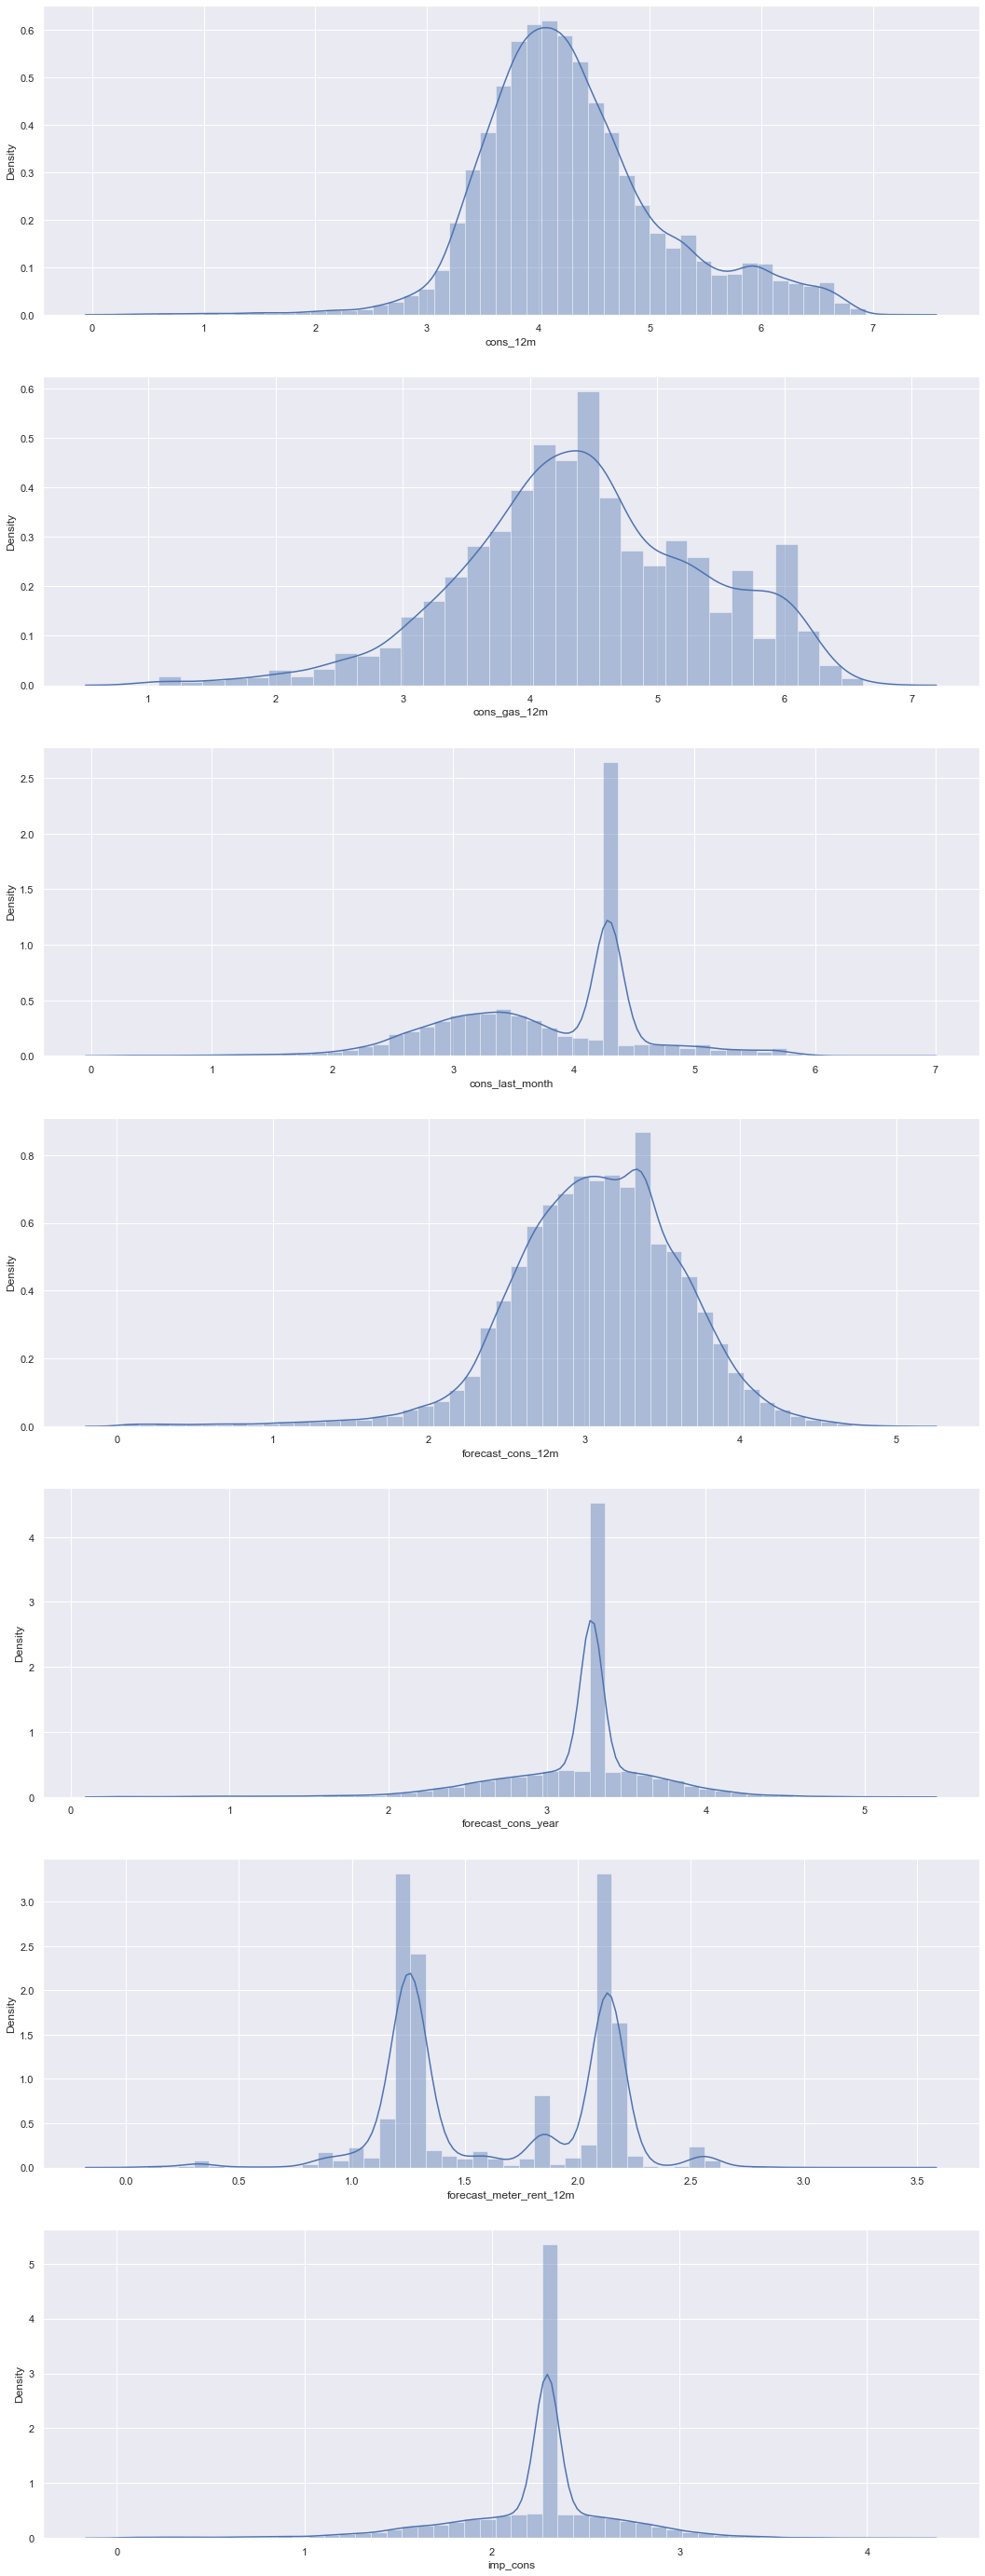

In [55]:
fig, axs = plt.subplots(nrows=7, figsize=(18,50))
sns.distplot((df_plot["cons_12m"].dropna()), ax=axs[0])
sns.distplot((df_plot[df_plot["has_gas"]==1]["cons_gas_12m"].dropna()), ax=axs[1])
sns.distplot((df_plot["cons_last_month"].dropna()), ax=axs[2])
sns.distplot((df_plot["forecast_cons_12m"].dropna()), ax=axs[3])
sns.distplot((df_plot["forecast_cons_year"].dropna()), ax=axs[4])
sns.distplot((df_plot["forecast_meter_rent_12m"].dropna()), ax=axs[5])
sns.distplot((df_plot["imp_cons"].dropna()), ax=axs[6])
plt.show()

In [56]:
factor = 3
upper_lim = df['cons_12m'].mean () + df['cons_12m'].std () * factor
lower_lim = df['cons_12m'].mean () - df['cons_12m'].std () * factor

df = df[(df['cons_12m'] < upper_lim) & (df['cons_12m'] > lower_lim)]

In [57]:
factor = 3
upper_lim = df['net_margin'].mean () + df['net_margin'].std () * factor
lower_lim = df['net_margin'].mean () - df['net_margin'].std () * factor

df = df[(df['net_margin'] < upper_lim) & (df['net_margin'] > lower_lim)]


In [58]:
factor = 3
upper_lim = df['cons_last_month'].mean () + df['cons_last_month'].std () * factor
lower_lim = df['cons_last_month'].mean () - df['cons_last_month'].std () * factor

df = df[(df['cons_last_month'] < upper_lim) & (df['cons_last_month'] > lower_lim)]

In [59]:
df.shape

(15656, 29)

In [60]:
df.reset_index()

,index,id,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,...,num_years_antig,pow_max,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix,churn
0,1,24011ae4ebbe3035111d65fa7c15bc57,5.286767,4.739944,4.288474,2013-06-15,2016-06-15,3.374651,3.280062,0.990265,...,3,43.648,2015-01-01,0.125976,0.103395,0.071536,40.565969,24.339581,16.226389,1
1,2,d29c2c54acc38ff3c0614d0a653813dd,3.668479,4.504132,4.288474,2009-08-21,2016-08-30,2.280920,3.280062,0.990265,...,6,13.800,2015-01-01,0.151367,0.000000,0.000000,44.266931,0.000000,0.000000,0
2,3,764c75f661154dac3a6c254cd082ea7d,2.736397,4.504132,4.288474,2010-04-16,2016-04-16,1.689841,3.280062,0.990265,...,6,13.856,2015-01-01,0.172468,0.087881,0.000000,44.266931,0.000000,0.000000,0
3,4,bba03439a292a1e166f80264c16191cb,3.200029,4.504132,4.288474,2010-03-30,2016-03-30,2.382089,3.280062,0.990265,...,6,13.200,2015-01-01,0.153133,0.000000,0.000000,44.266931,0.000000,0.000000,0
4,5,568bb38a1afd7c0fc49c77b3789b59a3,5.083990,4.504132,4.093457,2010-04-08,2016-04-08,4.036071,4.093457,0.990265,...,6,75.000,2015-01-01,0.123086,0.100505,0.068646,40.565969,24.339581,16.226389,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15651,16038,18463073fb097fc0ac5d3e040f356987,4.508812,4.680707,4.288474,2012-05-24,2016-05-08,3.667360,3.280062,0.990265,...,4,15.000,2015-01-01,0.148825,0.000000,0.000000,44.266931,0.000000,0.000000,0
15652,16039,d0a6f71671571ed83b2645d23af6de00,3.858778,4.504132,2.260071,2012-08-27,2016-08-27,2.801191,2.260071,0.990265,...,3,6.000,2015-01-01,0.109747,0.096908,0.070730,58.936774,36.344726,8.334260,1
15653,16040,10e6828ddd62cbcf687cb74928c4c2d2,3.265996,4.504132,2.255273,2012-02-08,2016-02-07,2.281919,2.255273,0.990265,...,4,15.935,2015-01-01,0.126098,0.103975,0.070232,40.565969,24.339581,16.226389,1
15654,16041,1cf20fd6206d7678d5bcafd28c53b4db,2.120574,4.504132,4.288474,2012-08-30,2016-08-30,1.308351,3.280062,0.990265,...,3,11.000,2015-01-01,0.151367,0.000000,0.000000,44.266931,0.000000,0.000000,0


In [61]:
df[df['cons_last_month'].notna()]

,id,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,...,num_years_antig,pow_max,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix,churn
1,24011ae4ebbe3035111d65fa7c15bc57,5.286767,4.739944,4.288474,2013-06-15,2016-06-15,3.374651,3.280062,0.990265,0.444045,...,3,43.648,2015-01-01,0.125976,0.103395,0.071536,40.565969,24.339581,16.226389,1
2,d29c2c54acc38ff3c0614d0a653813dd,3.668479,4.504132,4.288474,2009-08-21,2016-08-30,2.280920,3.280062,0.990265,1.237292,...,6,13.800,2015-01-01,0.151367,0.000000,0.000000,44.266931,0.000000,0.000000,0
3,764c75f661154dac3a6c254cd082ea7d,2.736397,4.504132,4.288474,2010-04-16,2016-04-16,1.689841,3.280062,0.990265,1.599009,...,6,13.856,2015-01-01,0.172468,0.087881,0.000000,44.266931,0.000000,0.000000,0
4,bba03439a292a1e166f80264c16191cb,3.200029,4.504132,4.288474,2010-03-30,2016-03-30,2.382089,3.280062,0.990265,1.318689,...,6,13.200,2015-01-01,0.153133,0.000000,0.000000,44.266931,0.000000,0.000000,0
5,568bb38a1afd7c0fc49c77b3789b59a3,5.083990,4.504132,4.093457,2010-04-08,2016-04-08,4.036071,4.093457,0.990265,2.234871,...,6,75.000,2015-01-01,0.123086,0.100505,0.068646,40.565969,24.339581,16.226389,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16038,18463073fb097fc0ac5d3e040f356987,4.508812,4.680707,4.288474,2012-05-24,2016-05-08,3.667360,3.280062,0.990265,1.291591,...,4,15.000,2015-01-01,0.148825,0.000000,0.000000,44.266931,0.000000,0.000000,0
16039,d0a6f71671571ed83b2645d23af6de00,3.858778,4.504132,2.260071,2012-08-27,2016-08-27,2.801191,2.260071,0.990265,2.161458,...,3,6.000,2015-01-01,0.109747,0.096908,0.070730,58.936774,36.344726,8.334260,1
16040,10e6828ddd62cbcf687cb74928c4c2d2,3.265996,4.504132,2.255273,2012-02-08,2016-02-07,2.281919,2.255273,0.990265,2.115943,...,4,15.935,2015-01-01,0.126098,0.103975,0.070232,40.565969,24.339581,16.226389,1
16041,1cf20fd6206d7678d5bcafd28c53b4db,2.120574,4.504132,4.288474,2012-08-30,2016-08-30,1.308351,3.280062,0.990265,0.912753,...,3,11.000,2015-01-01,0.151367,0.000000,0.000000,44.266931,0.000000,0.000000,0


In [62]:
df[df['cons_gas_12m'].notna()]

,id,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,...,num_years_antig,pow_max,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix,churn
1,24011ae4ebbe3035111d65fa7c15bc57,5.286767,4.739944,4.288474,2013-06-15,2016-06-15,3.374651,3.280062,0.990265,0.444045,...,3,43.648,2015-01-01,0.125976,0.103395,0.071536,40.565969,24.339581,16.226389,1
2,d29c2c54acc38ff3c0614d0a653813dd,3.668479,4.504132,4.288474,2009-08-21,2016-08-30,2.280920,3.280062,0.990265,1.237292,...,6,13.800,2015-01-01,0.151367,0.000000,0.000000,44.266931,0.000000,0.000000,0
3,764c75f661154dac3a6c254cd082ea7d,2.736397,4.504132,4.288474,2010-04-16,2016-04-16,1.689841,3.280062,0.990265,1.599009,...,6,13.856,2015-01-01,0.172468,0.087881,0.000000,44.266931,0.000000,0.000000,0
4,bba03439a292a1e166f80264c16191cb,3.200029,4.504132,4.288474,2010-03-30,2016-03-30,2.382089,3.280062,0.990265,1.318689,...,6,13.200,2015-01-01,0.153133,0.000000,0.000000,44.266931,0.000000,0.000000,0
5,568bb38a1afd7c0fc49c77b3789b59a3,5.083990,4.504132,4.093457,2010-04-08,2016-04-08,4.036071,4.093457,0.990265,2.234871,...,6,75.000,2015-01-01,0.123086,0.100505,0.068646,40.565969,24.339581,16.226389,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16038,18463073fb097fc0ac5d3e040f356987,4.508812,4.680707,4.288474,2012-05-24,2016-05-08,3.667360,3.280062,0.990265,1.291591,...,4,15.000,2015-01-01,0.148825,0.000000,0.000000,44.266931,0.000000,0.000000,0
16039,d0a6f71671571ed83b2645d23af6de00,3.858778,4.504132,2.260071,2012-08-27,2016-08-27,2.801191,2.260071,0.990265,2.161458,...,3,6.000,2015-01-01,0.109747,0.096908,0.070730,58.936774,36.344726,8.334260,1
16040,10e6828ddd62cbcf687cb74928c4c2d2,3.265996,4.504132,2.255273,2012-02-08,2016-02-07,2.281919,2.255273,0.990265,2.115943,...,4,15.935,2015-01-01,0.126098,0.103975,0.070232,40.565969,24.339581,16.226389,1
16041,1cf20fd6206d7678d5bcafd28c53b4db,2.120574,4.504132,4.288474,2012-08-30,2016-08-30,1.308351,3.280062,0.990265,0.912753,...,3,11.000,2015-01-01,0.151367,0.000000,0.000000,44.266931,0.000000,0.000000,0


In [63]:
df = df[df['cons_last_month'].notna()]
df = df[df['cons_gas_12m'].notna()]
df = df[df['imp_cons'].notna()]
df = df[df['forecast_meter_rent_12m'].notna()]
df = df[df['forecast_cons_12m'].notna()]
df = df[df['forecast_cons_year'].notna()]
df = df[df['forecast_meter_rent_12m'].notna()]

In [64]:
df["churn"] = df["churn"].astype(int)

In [65]:
df["churn"]

1        1
2        0
3        0
4        0
5        0
        ..
16038    0
16039    1
16040    1
16041    0
16042    0
Name: churn, Length: 15628, dtype: int32

In [66]:
id_number = df['id']

In [67]:
df.drop(columns=['id', "date_activ", "date_end", 'price_date'],inplace=True)

In [68]:
Y = df["churn"].values
X = df.drop(labels = ["churn"],axis = 1)

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=35)

## Using Logistic Regression

In [70]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter = 2000)
result = model.fit(X_train, y_train)

In [71]:
from sklearn import metrics
prediction_test = model.predict(X_test)

In [72]:
prediction_test

array([0, 0, 0, ..., 0, 0, 0])

In [73]:
print('Churn predictive model accuracy is ', 100 * metrics.accuracy_score(y_test, prediction_test ))

Churn predictive model accuracy is  89.82725527831093


In [74]:
df['probability_to_churn'] = model.predict_proba(df[X_train.columns])[:,1]

# merge back id_number column to match id's with probability of churn
result = pd.concat([ df, id_number], axis=1)

#result.to_excel('churn_probability_by_id.xlsx')
result.head()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,...,pow_max,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix,churn,probability_to_churn,id
1,5.286767,4.739944,4.288474,3.374651,3.280062,0.990265,0.444045,0.114481,0.098142,40.606701,...,43.648,0.125976,0.103395,0.071536,40.565969,24.339581,16.226389,1,0.122376,24011ae4ebbe3035111d65fa7c15bc57
2,3.668479,4.504132,4.288474,2.280920,3.280062,0.990265,1.237292,0.145711,0.052952,44.311378,...,13.800,0.151367,0.000000,0.000000,44.266931,0.000000,0.000000,0,0.075525,d29c2c54acc38ff3c0614d0a653813dd
3,2.736397,4.504132,4.288474,1.689841,3.280062,0.990265,1.599009,0.165794,0.087899,44.311378,...,13.856,0.172468,0.087881,0.000000,44.266931,0.000000,0.000000,0,0.098256,764c75f661154dac3a6c254cd082ea7d
4,3.200029,4.504132,4.288474,2.382089,3.280062,0.990265,1.318689,0.146694,0.052952,44.311378,...,13.200,0.153133,0.000000,0.000000,44.266931,0.000000,0.000000,0,0.095830,bba03439a292a1e166f80264c16191cb
5,5.083990,4.504132,4.093457,4.036071,4.093457,0.990265,2.234871,0.110083,0.093746,40.606701,...,75.000,0.123086,0.100505,0.068646,40.565969,24.339581,16.226389,0,0.083139,568bb38a1afd7c0fc49c77b3789b59a3


In [75]:
df[X_train.columns]

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,...,nb_prod_act,net_margin,num_years_antig,pow_max,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
1,5.286767,4.739944,4.288474,3.374651,3.280062,0.990265,0.444045,0.114481,0.098142,40.606701,...,2,678.99,3,43.648,0.125976,0.103395,0.071536,40.565969,24.339581,16.226389
2,3.668479,4.504132,4.288474,2.280920,3.280062,0.990265,1.237292,0.145711,0.052952,44.311378,...,1,18.89,6,13.800,0.151367,0.000000,0.000000,44.266931,0.000000,0.000000
3,2.736397,4.504132,4.288474,1.689841,3.280062,0.990265,1.599009,0.165794,0.087899,44.311378,...,1,6.60,6,13.856,0.172468,0.087881,0.000000,44.266931,0.000000,0.000000
4,3.200029,4.504132,4.288474,2.382089,3.280062,0.990265,1.318689,0.146694,0.052952,44.311378,...,1,25.46,6,13.200,0.153133,0.000000,0.000000,44.266931,0.000000,0.000000
5,5.083990,4.504132,4.093457,4.036071,4.093457,0.990265,2.234871,0.110083,0.093746,40.606701,...,1,823.18,6,75.000,0.123086,0.100505,0.068646,40.565969,24.339581,16.226389
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16038,4.508812,4.680707,4.288474,3.667360,3.280062,0.990265,1.291591,0.138305,0.052952,44.311378,...,2,381.77,4,15.000,0.148825,0.000000,0.000000,44.266931,0.000000,0.000000
16039,3.858778,4.504132,2.260071,2.801191,2.260071,0.990265,2.161458,0.100167,0.091892,58.995952,...,1,90.34,3,6.000,0.109747,0.096908,0.070730,58.936774,36.344726,8.334260
16040,3.265996,4.504132,2.255273,2.281919,2.255273,0.990265,2.115943,0.116900,0.100015,40.606701,...,1,20.38,4,15.935,0.126098,0.103975,0.070232,40.565969,24.339581,16.226389
16041,2.120574,4.504132,4.288474,1.308351,3.280062,0.990265,0.912753,0.145711,0.052952,44.311378,...,1,0.96,3,11.000,0.151367,0.000000,0.000000,44.266931,0.000000,0.000000


In [76]:
model.predict_proba(df[X_train.columns])

array([[0.87762353, 0.12237647],
       [0.92447541, 0.07552459],
       [0.90174425, 0.09825575],
       ...,
       [0.84136908, 0.15863092],
       [0.84784852, 0.15215148],
       [0.93066225, 0.06933775]])

In [77]:
model.predict_proba(df[X_train.columns])[:,1]

array([0.12237647, 0.07552459, 0.09825575, ..., 0.15863092, 0.15215148,
       0.06933775])

In [78]:
model.predict_proba(df[X_test.columns])[:,1]

array([0.12237647, 0.07552459, 0.09825575, ..., 0.15863092, 0.15215148,
       0.06933775])

In [79]:
result.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,...,num_years_antig,pow_max,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix,churn,probability_to_churn
count,15628.000000,15628.000000,15628.000000,15628.000000,15628.000000,15628.000000,15628.000000,15628.000000,15628.000000,15628.000000,...,15628.00000,15628.000000,15628.000000,15628.000000,15628.000000,15628.000000,15628.000000,15628.000000,15628.000000,15628.000000
mean,4.325261,4.487287,3.763063,3.074854,3.196937,1.912667,1.636982,0.136264,0.076520,43.767678,...,5.02310,19.708523,0.142776,0.054331,0.029988,43.198620,10.538924,6.396068,0.097453,0.096473
std,0.803837,0.411195,0.777973,0.518909,0.440543,4.904279,0.467608,0.025378,0.022818,3.787615,...,1.66229,18.361513,0.022686,0.050397,0.035791,5.236536,12.768468,7.769176,0.296584,0.043611
min,1.838849,1.079181,1.361728,0.041393,0.301030,0.990265,0.025306,0.000600,0.052952,-0.122184,...,1.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000087
25%,3.787726,4.504132,3.165541,2.750655,3.065860,0.990265,1.241048,0.115237,0.052952,40.606701,...,4.00000,12.500000,0.127566,0.000000,0.000000,40.565969,0.000000,0.000000,0.000000,0.072043
50%,4.194944,4.504132,3.881128,3.097306,3.280062,0.990265,1.369401,0.142881,0.085146,44.311378,...,5.00000,13.856000,0.148825,0.084991,0.000000,44.266931,0.000000,0.000000,0.000000,0.091785
75%,4.702534,4.504132,4.288474,3.418871,3.290758,0.990265,2.121954,0.146348,0.098837,44.311378,...,6.00000,19.800000,0.152445,0.103395,0.071536,44.266931,24.339581,16.226389,0.000000,0.114758
max,6.798393,6.622052,5.887169,4.684449,4.805976,50.000000,3.382502,0.273963,0.195975,59.444710,...,15.00000,500.000000,0.280700,0.229298,0.114102,59.444710,36.490689,16.791555,1.000000,0.907182


In [80]:
result.head()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,...,pow_max,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix,churn,probability_to_churn,id
1,5.286767,4.739944,4.288474,3.374651,3.280062,0.990265,0.444045,0.114481,0.098142,40.606701,...,43.648,0.125976,0.103395,0.071536,40.565969,24.339581,16.226389,1,0.122376,24011ae4ebbe3035111d65fa7c15bc57
2,3.668479,4.504132,4.288474,2.280920,3.280062,0.990265,1.237292,0.145711,0.052952,44.311378,...,13.800,0.151367,0.000000,0.000000,44.266931,0.000000,0.000000,0,0.075525,d29c2c54acc38ff3c0614d0a653813dd
3,2.736397,4.504132,4.288474,1.689841,3.280062,0.990265,1.599009,0.165794,0.087899,44.311378,...,13.856,0.172468,0.087881,0.000000,44.266931,0.000000,0.000000,0,0.098256,764c75f661154dac3a6c254cd082ea7d
4,3.200029,4.504132,4.288474,2.382089,3.280062,0.990265,1.318689,0.146694,0.052952,44.311378,...,13.200,0.153133,0.000000,0.000000,44.266931,0.000000,0.000000,0,0.095830,bba03439a292a1e166f80264c16191cb
5,5.083990,4.504132,4.093457,4.036071,4.093457,0.990265,2.234871,0.110083,0.093746,40.606701,...,75.000,0.123086,0.100505,0.068646,40.565969,24.339581,16.226389,0,0.083139,568bb38a1afd7c0fc49c77b3789b59a3


In [81]:
y_hat_train = model.predict(X_train)
df['churn_1'] = np.where(df['probability_to_churn']>=0.14, 1, 0)
df

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,...,pow_max,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix,churn,probability_to_churn,churn_1
1,5.286767,4.739944,4.288474,3.374651,3.280062,0.990265,0.444045,0.114481,0.098142,40.606701,...,43.648,0.125976,0.103395,0.071536,40.565969,24.339581,16.226389,1,0.122376,0
2,3.668479,4.504132,4.288474,2.280920,3.280062,0.990265,1.237292,0.145711,0.052952,44.311378,...,13.800,0.151367,0.000000,0.000000,44.266931,0.000000,0.000000,0,0.075525,0
3,2.736397,4.504132,4.288474,1.689841,3.280062,0.990265,1.599009,0.165794,0.087899,44.311378,...,13.856,0.172468,0.087881,0.000000,44.266931,0.000000,0.000000,0,0.098256,0
4,3.200029,4.504132,4.288474,2.382089,3.280062,0.990265,1.318689,0.146694,0.052952,44.311378,...,13.200,0.153133,0.000000,0.000000,44.266931,0.000000,0.000000,0,0.095830,0
5,5.083990,4.504132,4.093457,4.036071,4.093457,0.990265,2.234871,0.110083,0.093746,40.606701,...,75.000,0.123086,0.100505,0.068646,40.565969,24.339581,16.226389,0,0.083139,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16038,4.508812,4.680707,4.288474,3.667360,3.280062,0.990265,1.291591,0.138305,0.052952,44.311378,...,15.000,0.148825,0.000000,0.000000,44.266931,0.000000,0.000000,0,0.092457,0
16039,3.858778,4.504132,2.260071,2.801191,2.260071,0.990265,2.161458,0.100167,0.091892,58.995952,...,6.000,0.109747,0.096908,0.070730,58.936774,36.344726,8.334260,1,0.160618,1
16040,3.265996,4.504132,2.255273,2.281919,2.255273,0.990265,2.115943,0.116900,0.100015,40.606701,...,15.935,0.126098,0.103975,0.070232,40.565969,24.339581,16.226389,1,0.158631,1
16041,2.120574,4.504132,4.288474,1.308351,3.280062,0.990265,0.912753,0.145711,0.052952,44.311378,...,11.000,0.151367,0.000000,0.000000,44.266931,0.000000,0.000000,0,0.152151,1


In [82]:
from sklearn.metrics import plot_confusion_matrix
from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix
# Pass actual test and predicted target test outcomes to function
cnf_matrix = confusion_matrix(df['churn'], df['churn_1'])
cnf_matrix

array([[12850,  1255],
       [ 1221,   302]], dtype=int64)

In [83]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
precision_train = precision_score(y_train, y_hat_train)
precision_test = precision_score(df['churn'], df['churn_1'])
recall_train = recall_score(y_train, y_hat_train)
recall_test = recall_score(df['churn'], df['churn_1'])
accuracy_train = accuracy_score(y_train, y_hat_train)
accuracy_test = accuracy_score(df['churn'], df['churn_1'])
f1_train = f1_score(y_train, y_hat_train)
f1_test = f1_score(df['churn'], df['churn_1'])
print(precision_train)
print(precision_test)
print(recall_train)
print(recall_test)
print(accuracy_train)
print(accuracy_test)
print(f1_train)
print(f1_test)

0.42857142857142855
0.19396274887604367
0.004975124378109453
0.19829284307288247
0.9033754599264118
0.8415664192475045
0.009836065573770493
0.1961038961038961


In [84]:
residuals = np.abs(y_train, y_hat_train)
# Print the number of times our model was correct ('0') and incorrect ('1')
print(pd.Series(residuals).value_counts())
# Print normalized amount of times our model was correct (percentage)
print(pd.Series(residuals).value_counts(normalize = True))

0    11296
1     1206
dtype: int64
0    0.903535
1    0.096465
dtype: float64


In [85]:
residual = np.abs(y_test, prediction_test)
# Print the number of times our model was correct ('0') and incorrect ('1')
print(pd.Series(residual).value_counts())
# Print normalized amount of times our model was correct (percentage)
print(pd.Series(residual).value_counts(normalize = True))

0    2809
1     317
dtype: int64
0    0.898592
1    0.101408
dtype: float64


In [86]:
result_high_prob = result[result['probability_to_churn'] >= 0.25]
# average probability to churn in this set is 26%

result_low_prob = result[result['probability_to_churn'] <= 0.25]
# average probability to churn in this set is 10%

result_high_prob.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,...,num_years_antig,pow_max,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix,churn,probability_to_churn
count,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,...,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000
mean,3.999225,4.455240,3.632395,2.914513,3.162892,7.162232,1.833277,0.178263,0.092321,45.967587,...,3.644068,43.548186,0.166339,0.072277,0.048985,44.957541,15.456850,9.927172,0.262712,0.366745
std,0.880142,0.330324,0.811750,0.864851,0.645850,10.739011,0.505941,0.063930,0.034018,9.045658,...,0.910766,39.250589,0.055510,0.056311,0.039753,6.961705,12.329325,7.930097,0.441984,0.132279
min,2.068186,2.442480,1.544068,0.372912,1.041393,0.990265,0.133539,0.113323,0.052952,-0.122184,...,3.000000,10.350000,0.107070,0.000000,0.000000,39.818274,0.000000,0.000000,0.000000,0.250393
25%,3.258896,4.504132,3.227254,2.402060,3.227254,0.990265,1.289638,0.120372,0.052952,40.606701,...,3.000000,13.200000,0.127710,0.000000,0.000000,40.565969,0.000000,0.000000,0.000000,0.271674
50%,4.128402,4.504132,3.878085,2.998483,3.280062,0.990265,2.058072,0.154410,0.100015,41.105201,...,3.000000,30.375000,0.153159,0.103395,0.070232,41.063970,24.339581,16.226389,0.000000,0.312844
75%,4.651170,4.504132,4.288474,3.578037,3.365191,16.747566,2.162333,0.272979,0.125383,59.266378,...,4.000000,61.500000,0.156255,0.108020,0.074278,44.266931,24.437330,16.291555,1.000000,0.429325
max,6.223976,5.845639,5.308462,4.266765,4.479532,30.000000,2.611691,0.273963,0.168092,59.266378,...,6.000000,200.000000,0.280700,0.168867,0.101027,59.444710,36.344726,16.724389,1.000000,0.907182


In [87]:
result_low_prob.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,...,num_years_antig,pow_max,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix,churn,probability_to_churn
count,15510.000000,15510.000000,15510.000000,15510.000000,15510.000000,15510.000000,15510.000000,15510.000000,15510.000000,15510.000000,...,15510.000000,15510.000000,15510.000000,15510.000000,15510.000000,15510.000000,15510.000000,15510.000000,15510.000000,15510.000000
mean,4.327742,4.487530,3.764057,3.076074,3.197196,1.872728,1.635489,0.135944,0.076400,43.750941,...,5.033591,19.527151,0.142597,0.054195,0.029844,43.185239,10.501508,6.369203,0.096196,0.094417
std,0.802753,0.411749,0.777653,0.515243,0.438633,4.811825,0.467006,0.024588,0.022672,3.714943,...,1.662346,17.992524,0.022160,0.050327,0.035721,5.219253,12.764875,7.762045,0.294869,0.034991
min,1.838849,1.079181,1.361728,0.041393,0.301030,0.990265,0.025306,0.000600,0.052952,32.583108,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000087
25%,3.789105,4.504132,3.165244,2.753181,3.065206,0.990265,1.240799,0.115237,0.052952,40.606701,...,4.000000,12.500000,0.127566,0.000000,0.000000,40.565969,0.000000,0.000000,0.000000,0.071917
50%,4.195180,4.504132,3.881128,3.097597,3.280062,0.990265,1.360877,0.142881,0.085067,44.311378,...,5.000000,13.856000,0.148825,0.084769,0.000000,44.266931,0.000000,0.000000,0.000000,0.091581
75%,4.702534,4.504132,4.288474,3.417648,3.290424,0.990265,2.121954,0.146343,0.098837,44.311378,...,6.000000,19.800000,0.152445,0.103395,0.071536,44.266931,24.339581,16.226389,0.000000,0.114128
max,6.798393,6.622052,5.887169,4.684449,4.805976,50.000000,3.382502,0.273963,0.195975,59.444710,...,15.000000,500.000000,0.280700,0.229298,0.114102,59.444710,36.490689,16.791555,1.000000,0.249392


In [88]:
model.coef_

array([[-0.18969312, -0.24829772, -0.03835358, -0.04778759,  0.80145669,
        -0.00958759, -0.04436984, -0.28647133, -0.31283514, -0.06711616,
        -0.33328459, -0.78782635,  0.00991657,  0.00232443, -0.02634495,
         0.00110254, -0.15827706, -0.00634716, -0.15641667, -0.18989781,
        -0.0454168 ,  0.0559349 ,  0.02351637, -0.02693746]])

In [89]:
weights = pd.Series(model.coef_[0], index=X.columns.values)
weights.sort_values(ascending = False)

forecast_cons_year          0.801457
price_p1_fix                0.055935
price_p2_fix                0.023516
margin_gross_pow_ele        0.009917
margin_net_pow_ele          0.002324
net_margin                  0.001103
pow_max                    -0.006347
forecast_discount_energy   -0.009588
nb_prod_act                -0.026345
price_p3_fix               -0.026937
cons_last_month            -0.038354
forecast_meter_rent_12m    -0.044370
price_p3_var               -0.045417
forecast_cons_12m          -0.047788
forecast_price_pow_p1      -0.067116
price_p1_var               -0.156417
num_years_antig            -0.158277
cons_12m                   -0.189693
price_p2_var               -0.189898
cons_gas_12m               -0.248298
forecast_price_energy_p1   -0.286471
forecast_price_energy_p2   -0.312835
has_gas                    -0.333285
imp_cons                   -0.787826
dtype: float64

The top five positive variable weights are forecast_cons_year,price_p1_fix,price_p2_fix,margin_gross_pow_ele and margin_net_pow_ele. These variables promote customer churn and should be looked at further.

In [90]:
df_new = df.drop(labels = ["probability_to_churn", "churn_1"], axis = 1)
df_new['price_p2_fix'] = df_new['price_p2_fix'].astype(float)/1.25
#df_new['price_p3_fix'] = df_new['price_p3_fix'].astype(float)/1.25
#comment or uncomment the above line if you would like to test the scenarios listed
#in section 10D

df_new.head()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,...,net_margin,num_years_antig,pow_max,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix,churn
1,5.286767,4.739944,4.288474,3.374651,3.280062,0.990265,0.444045,0.114481,0.098142,40.606701,...,678.99,3,43.648,0.125976,0.103395,0.071536,40.565969,19.471665,16.226389,1
2,3.668479,4.504132,4.288474,2.280920,3.280062,0.990265,1.237292,0.145711,0.052952,44.311378,...,18.89,6,13.800,0.151367,0.000000,0.000000,44.266931,0.000000,0.000000,0
3,2.736397,4.504132,4.288474,1.689841,3.280062,0.990265,1.599009,0.165794,0.087899,44.311378,...,6.60,6,13.856,0.172468,0.087881,0.000000,44.266931,0.000000,0.000000,0
4,3.200029,4.504132,4.288474,2.382089,3.280062,0.990265,1.318689,0.146694,0.052952,44.311378,...,25.46,6,13.200,0.153133,0.000000,0.000000,44.266931,0.000000,0.000000,0
5,5.083990,4.504132,4.093457,4.036071,4.093457,0.990265,2.234871,0.110083,0.093746,40.606701,...,823.18,6,75.000,0.123086,0.100505,0.068646,40.565969,19.471665,16.226389,0


In [91]:
Y_new = df_new["churn"].values
X_new = df_new.drop(labels = ["churn"],axis = 1)

from sklearn.model_selection import train_test_split
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, Y_new, test_size=0.3, random_state=101)

In [92]:
df_new['probability_to_churn'] = model.predict_proba(df_new[X_train.columns])[:,1]
df_new.head()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,...,num_years_antig,pow_max,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix,churn,probability_to_churn
1,5.286767,4.739944,4.288474,3.374651,3.280062,0.990265,0.444045,0.114481,0.098142,40.606701,...,3,43.648,0.125976,0.103395,0.071536,40.565969,19.471665,16.226389,1,0.110604
2,3.668479,4.504132,4.288474,2.280920,3.280062,0.990265,1.237292,0.145711,0.052952,44.311378,...,6,13.800,0.151367,0.000000,0.000000,44.266931,0.000000,0.000000,0,0.075525
3,2.736397,4.504132,4.288474,1.689841,3.280062,0.990265,1.599009,0.165794,0.087899,44.311378,...,6,13.856,0.172468,0.087881,0.000000,44.266931,0.000000,0.000000,0,0.098256
4,3.200029,4.504132,4.288474,2.382089,3.280062,0.990265,1.318689,0.146694,0.052952,44.311378,...,6,13.200,0.153133,0.000000,0.000000,44.266931,0.000000,0.000000,0,0.095830
5,5.083990,4.504132,4.093457,4.036071,4.093457,0.990265,2.234871,0.110083,0.093746,40.606701,...,6,75.000,0.123086,0.100505,0.068646,40.565969,19.471665,16.226389,0,0.074819


In [93]:
y_hat_train_new = model.predict(X_train_new)
y_hat_test_new = model.predict(X_test_new)

In [94]:
from sklearn.metrics import plot_confusion_matrix
from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix
# Pass actual test and predicted target test outcomes to function
cnf_matrix_new = confusion_matrix(y_test_new, y_hat_test_new)
cnf_matrix_new

array([[4230,    1],
       [ 455,    3]], dtype=int64)

In [95]:
df_new.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,...,num_years_antig,pow_max,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix,churn,probability_to_churn
count,15628.000000,15628.000000,15628.000000,15628.000000,15628.000000,15628.000000,15628.000000,15628.000000,15628.000000,15628.000000,...,15628.00000,15628.000000,15628.000000,15628.000000,15628.000000,15628.000000,15628.000000,15628.000000,15628.000000,15628.000000
mean,4.325261,4.487287,3.763063,3.074854,3.196937,1.912667,1.636982,0.136264,0.076520,43.767678,...,5.02310,19.708523,0.142776,0.054331,0.029988,43.198620,8.431139,6.396068,0.097453,0.092050
std,0.803837,0.411195,0.777973,0.518909,0.440543,4.904279,0.467608,0.025378,0.022818,3.787615,...,1.66229,18.361513,0.022686,0.050397,0.035791,5.236536,10.214775,7.769176,0.296584,0.040996
min,1.838849,1.079181,1.361728,0.041393,0.301030,0.990265,0.025306,0.000600,0.052952,-0.122184,...,1.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000079
25%,3.787726,4.504132,3.165541,2.750655,3.065860,0.990265,1.241048,0.115237,0.052952,40.606701,...,4.00000,12.500000,0.127566,0.000000,0.000000,40.565969,0.000000,0.000000,0.000000,0.070020
50%,4.194944,4.504132,3.881128,3.097306,3.280062,0.990265,1.369401,0.142881,0.085146,44.311378,...,5.00000,13.856000,0.148825,0.084991,0.000000,44.266931,0.000000,0.000000,0.000000,0.088451
75%,4.702534,4.504132,4.288474,3.418871,3.290758,0.990265,2.121954,0.146348,0.098837,44.311378,...,6.00000,19.800000,0.152445,0.103395,0.071536,44.266931,19.471665,16.226389,0.000000,0.109876
max,6.798393,6.622052,5.887169,4.684449,4.805976,50.000000,3.382502,0.273963,0.195975,59.444710,...,15.00000,500.000000,0.280700,0.229298,0.114102,59.444710,29.192551,16.791555,1.000000,0.897083


In [96]:
df.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,...,pow_max,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix,churn,probability_to_churn,churn_1
count,15628.000000,15628.000000,15628.000000,15628.000000,15628.000000,15628.000000,15628.000000,15628.000000,15628.000000,15628.000000,...,15628.000000,15628.000000,15628.000000,15628.000000,15628.000000,15628.000000,15628.000000,15628.000000,15628.000000,15628.000000
mean,4.325261,4.487287,3.763063,3.074854,3.196937,1.912667,1.636982,0.136264,0.076520,43.767678,...,19.708523,0.142776,0.054331,0.029988,43.198620,10.538924,6.396068,0.097453,0.096473,0.099629
std,0.803837,0.411195,0.777973,0.518909,0.440543,4.904279,0.467608,0.025378,0.022818,3.787615,...,18.361513,0.022686,0.050397,0.035791,5.236536,12.768468,7.769176,0.296584,0.043611,0.299514
min,1.838849,1.079181,1.361728,0.041393,0.301030,0.990265,0.025306,0.000600,0.052952,-0.122184,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000087,0.000000
25%,3.787726,4.504132,3.165541,2.750655,3.065860,0.990265,1.241048,0.115237,0.052952,40.606701,...,12.500000,0.127566,0.000000,0.000000,40.565969,0.000000,0.000000,0.000000,0.072043,0.000000
50%,4.194944,4.504132,3.881128,3.097306,3.280062,0.990265,1.369401,0.142881,0.085146,44.311378,...,13.856000,0.148825,0.084991,0.000000,44.266931,0.000000,0.000000,0.000000,0.091785,0.000000
75%,4.702534,4.504132,4.288474,3.418871,3.290758,0.990265,2.121954,0.146348,0.098837,44.311378,...,19.800000,0.152445,0.103395,0.071536,44.266931,24.339581,16.226389,0.000000,0.114758,0.000000
max,6.798393,6.622052,5.887169,4.684449,4.805976,50.000000,3.382502,0.273963,0.195975,59.444710,...,500.000000,0.280700,0.229298,0.114102,59.444710,36.490689,16.791555,1.000000,0.907182,1.000000


 Average probability to churn goes down from 9.9% to 9.2% by reducing 'price_p2_fix' 
 by 20%. 

 (The following scenarios are not shown in this notebook)
 1. Churn probability actually goes up to 10.5% when reducing 'price_p3_fix' by 20% and
 leaving 'price_p2_fix' alone.

 2. Average probability to churn goes down from 10.25% to 9.9% by reducing 'price_p2_fix' 
 and 'price_p3_fix' by 20%.

## Using Random Forest

In [97]:
from sklearn.ensemble import RandomForestClassifier

In [100]:
model_rf = RandomForestClassifier()
result_rf = model_rf.fit(X_train, y_train)

In [104]:
prediction_test_rf = model_rf.predict(X_test)

In [105]:
prediction_test_rf

array([0, 0, 0, ..., 0, 0, 0])

In [106]:
print('Churn predictive model accuracy is ', 100 * metrics.accuracy_score(y_test, prediction_test_rf ))

Churn predictive model accuracy is  90.27511196417146


In [107]:
df['probability_to_churn_rf'] = model_rf.predict_proba(df[X_train.columns])[:,1]

# merge back id_number column to match id's with probability of churn
result = pd.concat([ df, id_number], axis=1)

#result.to_excel('churn_probability_by_id.xlsx')
result.head()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,...,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix,churn,probability_to_churn,churn_1,probability_to_churn_rf,id
1,5.286767,4.739944,4.288474,3.374651,3.280062,0.990265,0.444045,0.114481,0.098142,40.606701,...,0.103395,0.071536,40.565969,24.339581,16.226389,1,0.122376,0,0.21,24011ae4ebbe3035111d65fa7c15bc57
2,3.668479,4.504132,4.288474,2.280920,3.280062,0.990265,1.237292,0.145711,0.052952,44.311378,...,0.000000,0.000000,44.266931,0.000000,0.000000,0,0.075525,0,0.00,d29c2c54acc38ff3c0614d0a653813dd
3,2.736397,4.504132,4.288474,1.689841,3.280062,0.990265,1.599009,0.165794,0.087899,44.311378,...,0.087881,0.000000,44.266931,0.000000,0.000000,0,0.098256,0,0.09,764c75f661154dac3a6c254cd082ea7d
4,3.200029,4.504132,4.288474,2.382089,3.280062,0.990265,1.318689,0.146694,0.052952,44.311378,...,0.000000,0.000000,44.266931,0.000000,0.000000,0,0.095830,0,0.03,bba03439a292a1e166f80264c16191cb
5,5.083990,4.504132,4.093457,4.036071,4.093457,0.990265,2.234871,0.110083,0.093746,40.606701,...,0.100505,0.068646,40.565969,24.339581,16.226389,0,0.083139,0,0.01,568bb38a1afd7c0fc49c77b3789b59a3


In [108]:
model_rf.predict_proba(df[X_train.columns])[:,1]

array([0.21, 0.  , 0.09, ..., 0.08, 0.03, 0.03])

In [109]:
model_rf.predict_proba(df[X_test.columns])[:,1]

array([0.21, 0.  , 0.09, ..., 0.08, 0.03, 0.03])

In [113]:
result.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,...,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix,churn,probability_to_churn,churn_1,probability_to_churn_rf
count,15628.000000,15628.000000,15628.000000,15628.000000,15628.000000,15628.000000,15628.000000,15628.000000,15628.000000,15628.000000,...,15628.000000,15628.000000,15628.000000,15628.000000,15628.000000,15628.000000,15628.000000,15628.000000,15628.000000,15628.000000
mean,4.325261,4.487287,3.763063,3.074854,3.196937,1.912667,1.636982,0.136264,0.076520,43.767678,...,0.142776,0.054331,0.029988,43.198620,10.538924,6.396068,0.097453,0.096473,0.099629,0.100532
std,0.803837,0.411195,0.777973,0.518909,0.440543,4.904279,0.467608,0.025378,0.022818,3.787615,...,0.022686,0.050397,0.035791,5.236536,12.768468,7.769176,0.296584,0.043611,0.299514,0.182874
min,1.838849,1.079181,1.361728,0.041393,0.301030,0.990265,0.025306,0.000600,0.052952,-0.122184,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000087,0.000000,0.000000
25%,3.787726,4.504132,3.165541,2.750655,3.065860,0.990265,1.241048,0.115237,0.052952,40.606701,...,0.127566,0.000000,0.000000,40.565969,0.000000,0.000000,0.000000,0.072043,0.000000,0.020000
50%,4.194944,4.504132,3.881128,3.097306,3.280062,0.990265,1.369401,0.142881,0.085146,44.311378,...,0.148825,0.084991,0.000000,44.266931,0.000000,0.000000,0.000000,0.091785,0.000000,0.040000
75%,4.702534,4.504132,4.288474,3.418871,3.290758,0.990265,2.121954,0.146348,0.098837,44.311378,...,0.152445,0.103395,0.071536,44.266931,24.339581,16.226389,0.000000,0.114758,0.000000,0.080000
max,6.798393,6.622052,5.887169,4.684449,4.805976,50.000000,3.382502,0.273963,0.195975,59.444710,...,0.280700,0.229298,0.114102,59.444710,36.490689,16.791555,1.000000,0.907182,1.000000,0.990000


In [114]:
result.head()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,...,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix,churn,probability_to_churn,churn_1,probability_to_churn_rf,id
1,5.286767,4.739944,4.288474,3.374651,3.280062,0.990265,0.444045,0.114481,0.098142,40.606701,...,0.103395,0.071536,40.565969,24.339581,16.226389,1,0.122376,0,0.21,24011ae4ebbe3035111d65fa7c15bc57
2,3.668479,4.504132,4.288474,2.280920,3.280062,0.990265,1.237292,0.145711,0.052952,44.311378,...,0.000000,0.000000,44.266931,0.000000,0.000000,0,0.075525,0,0.00,d29c2c54acc38ff3c0614d0a653813dd
3,2.736397,4.504132,4.288474,1.689841,3.280062,0.990265,1.599009,0.165794,0.087899,44.311378,...,0.087881,0.000000,44.266931,0.000000,0.000000,0,0.098256,0,0.09,764c75f661154dac3a6c254cd082ea7d
4,3.200029,4.504132,4.288474,2.382089,3.280062,0.990265,1.318689,0.146694,0.052952,44.311378,...,0.000000,0.000000,44.266931,0.000000,0.000000,0,0.095830,0,0.03,bba03439a292a1e166f80264c16191cb
5,5.083990,4.504132,4.093457,4.036071,4.093457,0.990265,2.234871,0.110083,0.093746,40.606701,...,0.100505,0.068646,40.565969,24.339581,16.226389,0,0.083139,0,0.01,568bb38a1afd7c0fc49c77b3789b59a3


In [115]:
y_hat_train_rf = model_rf.predict(X_train)
df['churn_2'] = np.where(df['probability_to_churn_rf']>=0.14, 1, 0)
df

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,...,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix,churn,probability_to_churn,churn_1,probability_to_churn_rf,churn_2
1,5.286767,4.739944,4.288474,3.374651,3.280062,0.990265,0.444045,0.114481,0.098142,40.606701,...,0.103395,0.071536,40.565969,24.339581,16.226389,1,0.122376,0,0.21,1
2,3.668479,4.504132,4.288474,2.280920,3.280062,0.990265,1.237292,0.145711,0.052952,44.311378,...,0.000000,0.000000,44.266931,0.000000,0.000000,0,0.075525,0,0.00,0
3,2.736397,4.504132,4.288474,1.689841,3.280062,0.990265,1.599009,0.165794,0.087899,44.311378,...,0.087881,0.000000,44.266931,0.000000,0.000000,0,0.098256,0,0.09,0
4,3.200029,4.504132,4.288474,2.382089,3.280062,0.990265,1.318689,0.146694,0.052952,44.311378,...,0.000000,0.000000,44.266931,0.000000,0.000000,0,0.095830,0,0.03,0
5,5.083990,4.504132,4.093457,4.036071,4.093457,0.990265,2.234871,0.110083,0.093746,40.606701,...,0.100505,0.068646,40.565969,24.339581,16.226389,0,0.083139,0,0.01,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16038,4.508812,4.680707,4.288474,3.667360,3.280062,0.990265,1.291591,0.138305,0.052952,44.311378,...,0.000000,0.000000,44.266931,0.000000,0.000000,0,0.092457,0,0.05,0
16039,3.858778,4.504132,2.260071,2.801191,2.260071,0.990265,2.161458,0.100167,0.091892,58.995952,...,0.096908,0.070730,58.936774,36.344726,8.334260,1,0.160618,1,0.74,1
16040,3.265996,4.504132,2.255273,2.281919,2.255273,0.990265,2.115943,0.116900,0.100015,40.606701,...,0.103975,0.070232,40.565969,24.339581,16.226389,1,0.158631,1,0.08,0
16041,2.120574,4.504132,4.288474,1.308351,3.280062,0.990265,0.912753,0.145711,0.052952,44.311378,...,0.000000,0.000000,44.266931,0.000000,0.000000,0,0.152151,1,0.03,0


In [116]:
cnf_matrix_rf = confusion_matrix(df['churn'], df['churn_2'])
cnf_matrix_rf

array([[13215,   890],
       [  150,  1373]], dtype=int64)

In [117]:
precision_train = precision_score(y_train, y_hat_train_rf)
precision_test = precision_score(df['churn'], df['churn_2'])
recall_train = recall_score(y_train, y_hat_train_rf)
recall_test = recall_score(df['churn'], df['churn_2'])
accuracy_train = accuracy_score(y_train, y_hat_train_rf)
accuracy_test = accuracy_score(df['churn'], df['churn_2'])
f1_train = f1_score(y_train, y_hat_train_rf)
f1_test = f1_score(df['churn'], df['churn_2'])
print(precision_train)
print(precision_test)
print(recall_train)
print(recall_test)
print(accuracy_train)
print(accuracy_test)
print(f1_train)
print(f1_test)

1.0
0.6067167476800707
0.9983416252072969
0.9015101772816809
0.9998400255959047
0.9334527770668032
0.9991701244813278
0.7253037506603275


In [118]:
residuals = np.abs(y_train, y_hat_train_rf)
# Print the number of times our model was correct ('0') and incorrect ('1')
print(pd.Series(residuals).value_counts())
# Print normalized amount of times our model was correct (percentage)
print(pd.Series(residuals).value_counts(normalize = True))

0    11296
1     1206
dtype: int64
0    0.903535
1    0.096465
dtype: float64


In [121]:
residual = np.abs(y_test, prediction_test_rf)
# Print the number of times our model was correct ('0') and incorrect ('1')
print(pd.Series(residual).value_counts())
# Print normalized amount of times our model was correct (percentage)
print(pd.Series(residual).value_counts(normalize = True))

0    2809
1     317
dtype: int64
0    0.898592
1    0.101408
dtype: float64


In [122]:
result_high_prob_rf = result[result['probability_to_churn_rf'] >= 0.25]
# average probability to churn in this set is 26%

result_low_prob_rf = result[result['probability_to_churn_rf'] <= 0.25]
# average probability to churn in this set is 10%

result_high_prob_rf.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,...,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix,churn,probability_to_churn,churn_1,probability_to_churn_rf
count,1478.000000,1478.000000,1478.000000,1478.000000,1478.000000,1478.000000,1478.000000,1478.000000,1478.000000,1478.000000,...,1478.000000,1478.000000,1478.000000,1478.000000,1478.000000,1478.000000,1478.000000,1478.000000,1478.000000,1478.000000
mean,4.265674,4.450845,3.695965,3.082697,3.196692,2.099604,1.687031,0.135335,0.078359,43.511767,...,0.142489,0.058769,0.034990,43.249892,12.153352,7.512201,0.867388,0.119832,0.233424,0.628451
std,0.717830,0.357827,0.740908,0.540945,0.441204,5.343454,0.474739,0.025367,0.023541,3.873325,...,0.021344,0.050888,0.036557,3.935909,12.838597,7.952184,0.339269,0.065514,0.423153,0.162173
min,1.913814,1.556303,1.361728,0.245513,0.903090,0.990265,0.130334,0.000600,0.052952,32.583108,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000859,0.000000,0.250000
25%,3.792321,4.504132,3.140507,2.737129,3.081437,0.990265,1.245759,0.115237,0.052952,40.606701,...,0.127053,0.000000,0.000000,40.565969,0.000000,0.000000,1.000000,0.085849,0.000000,0.610000
50%,4.206326,4.504132,3.804991,3.112680,3.280062,0.990265,1.852865,0.140621,0.087719,44.311378,...,0.146743,0.087881,0.000000,44.266931,0.000000,0.000000,1.000000,0.111222,0.000000,0.670000
75%,4.672872,4.504132,4.288474,3.467402,3.287130,0.990265,2.124268,0.145711,0.099419,44.311378,...,0.152177,0.104383,0.071661,44.266931,24.339581,16.226389,1.000000,0.137539,0.000000,0.720000
max,6.798393,5.918211,5.750403,4.359727,4.531389,30.000000,3.382502,0.273963,0.168092,59.266378,...,0.280700,0.168256,0.114102,59.444710,36.490689,16.791555,1.000000,0.907182,1.000000,0.990000


In [123]:
result_low_prob_rf.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,...,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix,churn,probability_to_churn,churn_1,probability_to_churn_rf
count,14185.000000,14185.000000,14185.000000,14185.000000,14185.000000,14185.000000,14185.000000,14185.000000,14185.000000,14185.000000,...,14185.000000,14185.000000,14185.000000,14185.000000,14185.000000,14185.000000,14185.000000,14185.000000,14185.000000,14185.000000
mean,4.331356,4.490955,3.769994,3.074198,3.196970,1.898811,1.631897,0.136366,0.076341,43.791475,...,0.142806,0.053892,0.029486,43.192843,10.376493,6.284074,0.017272,0.094108,0.086077,0.045894
std,0.812038,0.416358,0.781360,0.516934,0.440582,4.871435,0.466496,0.025379,0.022746,3.774731,...,0.022815,0.050326,0.035675,5.350255,12.750212,7.742064,0.130287,0.039914,0.280487,0.046211
min,1.838849,1.079181,1.361728,0.041393,0.301030,0.990265,0.025306,0.000600,0.052952,-0.122184,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000087,0.000000,0.000000
25%,3.787673,4.504132,3.168203,2.752179,3.064832,0.990265,1.240549,0.115237,0.052952,40.606701,...,0.127566,0.000000,0.000000,40.565969,0.000000,0.000000,0.000000,0.071115,0.000000,0.010000
50%,4.193375,4.504132,3.892873,3.095633,3.280062,0.990265,1.347720,0.142996,0.084973,44.311378,...,0.149050,0.084252,0.000000,44.266931,0.000000,0.000000,0.000000,0.090410,0.000000,0.030000
75%,4.705582,4.504132,4.288474,3.415319,3.291369,0.990265,2.121888,0.146348,0.098837,44.311378,...,0.152445,0.103395,0.071536,44.266931,24.339581,16.226389,0.000000,0.112258,0.000000,0.060000
max,6.798393,6.622052,5.887169,4.684449,4.805976,50.000000,3.022589,0.273963,0.195975,59.444710,...,0.280700,0.229298,0.101027,59.444710,36.490689,16.724389,1.000000,0.661822,1.000000,0.250000


In [126]:
model_rf.feature_importances_

array([0.08945969, 0.02324136, 0.0601575 , 0.08468842, 0.05017625,
       0.00296713, 0.09115895, 0.05586147, 0.02772282, 0.01668628,
       0.00597155, 0.0497378 , 0.07424231, 0.07226369, 0.01127966,
       0.0860058 , 0.03168818, 0.05651301, 0.04957775, 0.0227885 ,
       0.01768384, 0.01015325, 0.00471947, 0.00525535])

In [127]:
weights_rf = pd.Series(model_rf.feature_importances_, index=X.columns.values)
weights_rf.sort_values(ascending = False)

forecast_meter_rent_12m     0.091159
cons_12m                    0.089460
net_margin                  0.086006
forecast_cons_12m           0.084688
margin_gross_pow_ele        0.074242
margin_net_pow_ele          0.072264
cons_last_month             0.060157
pow_max                     0.056513
forecast_price_energy_p1    0.055861
forecast_cons_year          0.050176
imp_cons                    0.049738
price_p1_var                0.049578
num_years_antig             0.031688
forecast_price_energy_p2    0.027723
cons_gas_12m                0.023241
price_p2_var                0.022788
price_p3_var                0.017684
forecast_price_pow_p1       0.016686
nb_prod_act                 0.011280
price_p1_fix                0.010153
has_gas                     0.005972
price_p3_fix                0.005255
price_p2_fix                0.004719
forecast_discount_energy    0.002967
dtype: float64

In [128]:
df_new_rf = df.drop(labels = ["probability_to_churn_rf", "churn_2"], axis = 1)
df_new_rf['price_p2_fix'] = df_new_rf['price_p2_fix'].astype(float)/1.25
#df_new['price_p3_fix'] = df_new['price_p3_fix'].astype(float)/1.25
#comment or uncomment the above line if you would like to test the scenarios listed
#in section 10D

df_new_rf.head()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,...,pow_max,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix,churn,probability_to_churn,churn_1
1,5.286767,4.739944,4.288474,3.374651,3.280062,0.990265,0.444045,0.114481,0.098142,40.606701,...,43.648,0.125976,0.103395,0.071536,40.565969,19.471665,16.226389,1,0.122376,0
2,3.668479,4.504132,4.288474,2.280920,3.280062,0.990265,1.237292,0.145711,0.052952,44.311378,...,13.800,0.151367,0.000000,0.000000,44.266931,0.000000,0.000000,0,0.075525,0
3,2.736397,4.504132,4.288474,1.689841,3.280062,0.990265,1.599009,0.165794,0.087899,44.311378,...,13.856,0.172468,0.087881,0.000000,44.266931,0.000000,0.000000,0,0.098256,0
4,3.200029,4.504132,4.288474,2.382089,3.280062,0.990265,1.318689,0.146694,0.052952,44.311378,...,13.200,0.153133,0.000000,0.000000,44.266931,0.000000,0.000000,0,0.095830,0
5,5.083990,4.504132,4.093457,4.036071,4.093457,0.990265,2.234871,0.110083,0.093746,40.606701,...,75.000,0.123086,0.100505,0.068646,40.565969,19.471665,16.226389,0,0.083139,0


In [129]:
df_new_rf = df_new_rf.drop(labels = ["probability_to_churn", "churn_1"], axis = 1)

In [130]:
df_new_rf.head()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,...,net_margin,num_years_antig,pow_max,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix,churn
1,5.286767,4.739944,4.288474,3.374651,3.280062,0.990265,0.444045,0.114481,0.098142,40.606701,...,678.99,3,43.648,0.125976,0.103395,0.071536,40.565969,19.471665,16.226389,1
2,3.668479,4.504132,4.288474,2.280920,3.280062,0.990265,1.237292,0.145711,0.052952,44.311378,...,18.89,6,13.800,0.151367,0.000000,0.000000,44.266931,0.000000,0.000000,0
3,2.736397,4.504132,4.288474,1.689841,3.280062,0.990265,1.599009,0.165794,0.087899,44.311378,...,6.60,6,13.856,0.172468,0.087881,0.000000,44.266931,0.000000,0.000000,0
4,3.200029,4.504132,4.288474,2.382089,3.280062,0.990265,1.318689,0.146694,0.052952,44.311378,...,25.46,6,13.200,0.153133,0.000000,0.000000,44.266931,0.000000,0.000000,0
5,5.083990,4.504132,4.093457,4.036071,4.093457,0.990265,2.234871,0.110083,0.093746,40.606701,...,823.18,6,75.000,0.123086,0.100505,0.068646,40.565969,19.471665,16.226389,0


In [131]:
Y_new_rf = df_new_rf["churn"].values
X_new_rf = df_new_rf.drop(labels = ["churn"],axis = 1)

X_train_new_rf, X_test_new_rf, y_train_new_rf, y_test_new_rf = train_test_split(X_new_rf, Y_new_rf, test_size=0.3, random_state=101)

In [132]:
df_new_rf['probability_to_churn'] = model_rf.predict_proba(df_new_rf[X_train.columns])[:,1]
df_new_rf.head()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,...,num_years_antig,pow_max,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix,churn,probability_to_churn
1,5.286767,4.739944,4.288474,3.374651,3.280062,0.990265,0.444045,0.114481,0.098142,40.606701,...,3,43.648,0.125976,0.103395,0.071536,40.565969,19.471665,16.226389,1,0.23
2,3.668479,4.504132,4.288474,2.280920,3.280062,0.990265,1.237292,0.145711,0.052952,44.311378,...,6,13.800,0.151367,0.000000,0.000000,44.266931,0.000000,0.000000,0,0.00
3,2.736397,4.504132,4.288474,1.689841,3.280062,0.990265,1.599009,0.165794,0.087899,44.311378,...,6,13.856,0.172468,0.087881,0.000000,44.266931,0.000000,0.000000,0,0.09
4,3.200029,4.504132,4.288474,2.382089,3.280062,0.990265,1.318689,0.146694,0.052952,44.311378,...,6,13.200,0.153133,0.000000,0.000000,44.266931,0.000000,0.000000,0,0.03
5,5.083990,4.504132,4.093457,4.036071,4.093457,0.990265,2.234871,0.110083,0.093746,40.606701,...,6,75.000,0.123086,0.100505,0.068646,40.565969,19.471665,16.226389,0,0.02


In [133]:
y_hat_train_new_rf = model_rf.predict(X_train_new_rf)
y_hat_test_new_rf = model_rf.predict(X_test_new_rf)

In [135]:
cnf_matrix_new_rf = confusion_matrix(y_test_new_rf, y_hat_test_new_rf)
cnf_matrix_new_rf

array([[4229,    2],
       [  99,  359]], dtype=int64)

In [136]:
df_new_rf.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,...,num_years_antig,pow_max,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix,churn,probability_to_churn
count,15628.000000,15628.000000,15628.000000,15628.000000,15628.000000,15628.000000,15628.000000,15628.000000,15628.000000,15628.000000,...,15628.00000,15628.000000,15628.000000,15628.000000,15628.000000,15628.000000,15628.000000,15628.000000,15628.000000,15628.000000
mean,4.325261,4.487287,3.763063,3.074854,3.196937,1.912667,1.636982,0.136264,0.076520,43.767678,...,5.02310,19.708523,0.142776,0.054331,0.029988,43.198620,8.431139,6.396068,0.097453,0.102677
std,0.803837,0.411195,0.777973,0.518909,0.440543,4.904279,0.467608,0.025378,0.022818,3.787615,...,1.66229,18.361513,0.022686,0.050397,0.035791,5.236536,10.214775,7.769176,0.296584,0.180743
min,1.838849,1.079181,1.361728,0.041393,0.301030,0.990265,0.025306,0.000600,0.052952,-0.122184,...,1.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.787726,4.504132,3.165541,2.750655,3.065860,0.990265,1.241048,0.115237,0.052952,40.606701,...,4.00000,12.500000,0.127566,0.000000,0.000000,40.565969,0.000000,0.000000,0.000000,0.020000
50%,4.194944,4.504132,3.881128,3.097306,3.280062,0.990265,1.369401,0.142881,0.085146,44.311378,...,5.00000,13.856000,0.148825,0.084991,0.000000,44.266931,0.000000,0.000000,0.000000,0.040000
75%,4.702534,4.504132,4.288474,3.418871,3.290758,0.990265,2.121954,0.146348,0.098837,44.311378,...,6.00000,19.800000,0.152445,0.103395,0.071536,44.266931,19.471665,16.226389,0.000000,0.090000
max,6.798393,6.622052,5.887169,4.684449,4.805976,50.000000,3.382502,0.273963,0.195975,59.444710,...,15.00000,500.000000,0.280700,0.229298,0.114102,59.444710,29.192551,16.791555,1.000000,0.990000


In [137]:
df.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,...,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix,churn,probability_to_churn,churn_1,probability_to_churn_rf,churn_2
count,15628.000000,15628.000000,15628.000000,15628.000000,15628.000000,15628.000000,15628.000000,15628.000000,15628.000000,15628.000000,...,15628.000000,15628.000000,15628.000000,15628.000000,15628.000000,15628.000000,15628.000000,15628.000000,15628.000000,15628.000000
mean,4.325261,4.487287,3.763063,3.074854,3.196937,1.912667,1.636982,0.136264,0.076520,43.767678,...,0.054331,0.029988,43.198620,10.538924,6.396068,0.097453,0.096473,0.099629,0.100532,0.144804
std,0.803837,0.411195,0.777973,0.518909,0.440543,4.904279,0.467608,0.025378,0.022818,3.787615,...,0.050397,0.035791,5.236536,12.768468,7.769176,0.296584,0.043611,0.299514,0.182874,0.351915
min,1.838849,1.079181,1.361728,0.041393,0.301030,0.990265,0.025306,0.000600,0.052952,-0.122184,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000087,0.000000,0.000000,0.000000
25%,3.787726,4.504132,3.165541,2.750655,3.065860,0.990265,1.241048,0.115237,0.052952,40.606701,...,0.000000,0.000000,40.565969,0.000000,0.000000,0.000000,0.072043,0.000000,0.020000,0.000000
50%,4.194944,4.504132,3.881128,3.097306,3.280062,0.990265,1.369401,0.142881,0.085146,44.311378,...,0.084991,0.000000,44.266931,0.000000,0.000000,0.000000,0.091785,0.000000,0.040000,0.000000
75%,4.702534,4.504132,4.288474,3.418871,3.290758,0.990265,2.121954,0.146348,0.098837,44.311378,...,0.103395,0.071536,44.266931,24.339581,16.226389,0.000000,0.114758,0.000000,0.080000,0.000000
max,6.798393,6.622052,5.887169,4.684449,4.805976,50.000000,3.382502,0.273963,0.195975,59.444710,...,0.229298,0.114102,59.444710,36.490689,16.791555,1.000000,0.907182,1.000000,0.990000,1.000000
